# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [3]:
data = pd.read_csv('weight-height.csv')
data.index
male_df = data.loc[data['Gender']=='Male']
female_df = data.loc[data['Gender']=='Female']

male_height_mean = male_df[['Height']].mean()  
male_height_sd = male_df[['Height']].std()
male_weight_mean = male_df[['Weight']].mean()
male_weight_sd = male_df[['Weight']].std()
female_height_mean = female_df[['Height']].mean()  
female_height_sd = female_df[['Height']].std()
female_weight_mean = female_df[['Weight']].mean()
female_weight_sd = female_df[['Weight']].std()

print([male_height_mean, male_height_sd, male_weight_mean, male_weight_sd])
print([female_height_mean, female_height_sd, female_weight_mean, female_weight_sd])
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

[Height    69.026346
dtype: float64, Height    2.863362
dtype: float64, Weight    187.020621
dtype: float64, Weight    19.781155
dtype: float64]
[Height    63.708774
dtype: float64, Height    2.696284
dtype: float64, Weight    135.860093
dtype: float64, Weight    19.022468
dtype: float64]


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

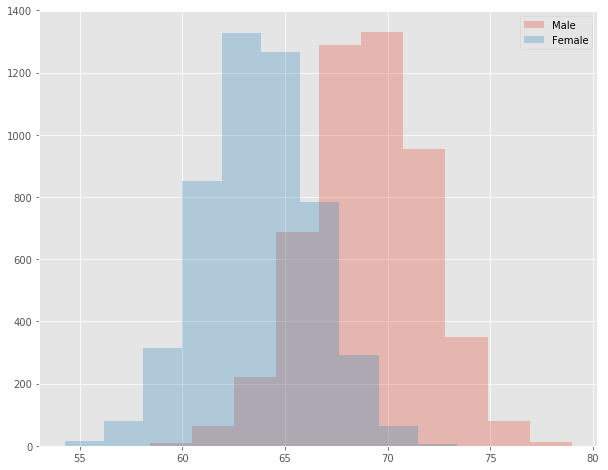

In [6]:
plt.figure(figsize = (10,8))
plt.hist(male_df['Height'], bins = 10, alpha = 0.3)
plt.hist(female_df['Height'], bins = 10, alpha = 0.3)
plt.legend(['Male','Female'])
plt.show()

In [ ]:
# Record your observations - are these inline with your personal observations?

# Based on the overlapped data we can predict that men on average are taller than women


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

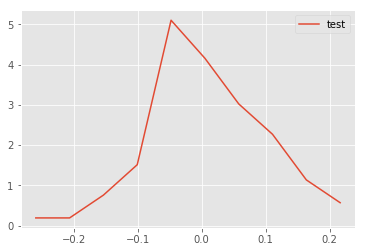

In [12]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx,pdfy



# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

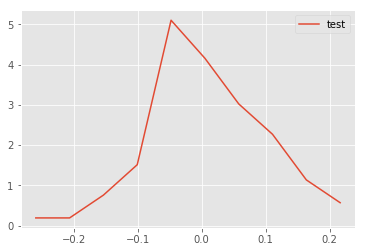

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

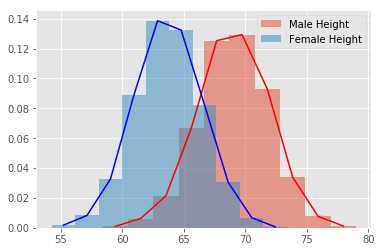

In [32]:
plt.figure(figsize = (6,4))
plt.hist(male_df['Height'], density=True, bins = 10, alpha = 0.5)
plt.hist(female_df['Height'], density=True, bins = 10, alpha = 0.5)
plt.legend(['Male Height','Female Height'])
male_x,male_y = density(male_df[['Height']])
plt.plot(male_x,male_y,'r-')
female_x,female_y = density(female_df[['Height']])
plt.plot(female_x,female_y,'b-')
plt.show()

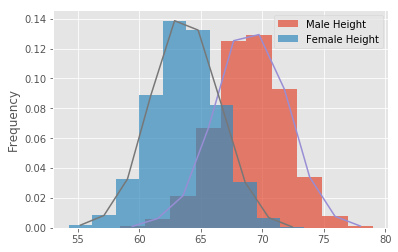

#### Repeat above exerice for male and female weights

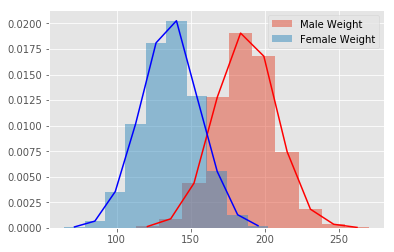

In [33]:
plt.figure(figsize = (6,4))
plt.hist(male_df['Weight'], density=True, bins = 10, alpha = 0.5)
plt.hist(female_df['Weight'], density=True, bins = 10, alpha = 0.5)
plt.legend(['Male Weight','Female Weight'])
male_x,male_y = density(male_df[['Weight']])
plt.plot(male_x,male_y,'r-')
female_x,female_y = density(female_df[['Weight']])
plt.plot(female_x,female_y,'b-')
plt.show()

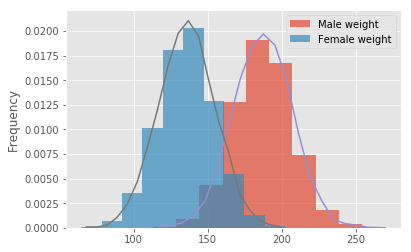

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 
# Men are generally bigger and taller than women


#### Repeat Above experiments in seaborn and compare with your results. 

Text(0.5, 1.0, 'Comparing weights')

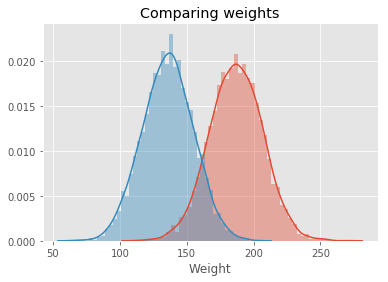

In [44]:
import seaborn as sns

fig=sns.distplot(male_df['Weight'])
sns.distplot(female_df['Weight'])
fig.set_title('Comparing weights')

Text(0.5,1,'Comparing weights')

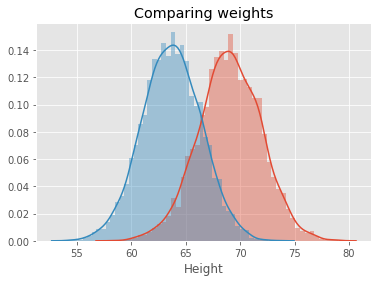

Text(0.5, 1.0, 'Comparing heights')

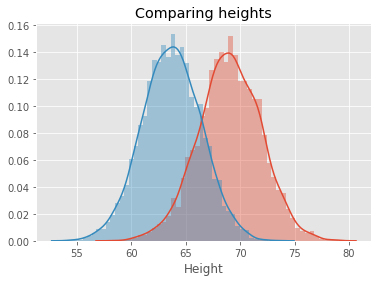

In [45]:
fig=sns.distplot(male_df['Height'])
sns.distplot(female_df['Height'])
fig.set_title('Comparing heights')

Text(0.5,1,'Comparing Weights')

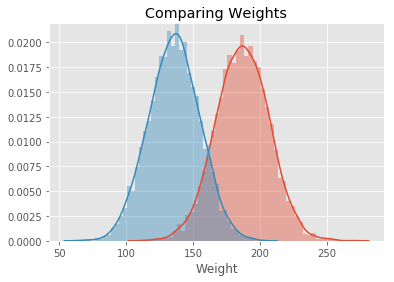

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?
# Seaborn has a lot of the work automated in the displot function

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.